In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [129]:
import keras
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
from sklearn.preprocessing import MinMaxScaler

In [78]:
###mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Read the stock price data

In [130]:
stock_df= pd.read_csv('./drive/My Drive/Colab Notebooks/GME_stock.csv',parse_dates=["date"])

In [131]:
stock_df.tail()

,date,open_price,high_price,low_price,close_price,volume,adjclose_price
4768,2002-02-20,9.600,9.875,9.525,9.875,1723200.0,6.648838
4769,2002-02-19,9.900,9.900,9.375,9.550,1852600.0,6.430017
4770,2002-02-15,10.000,10.025,9.850,9.950,2097400.0,6.699336
4771,2002-02-14,10.175,10.195,9.925,10.000,2755400.0,6.733003
4772,2002-02-13,9.625,10.060,9.525,10.050,19054000.0,6.766666


In [132]:
stock_df.head()

,date,open_price,high_price,low_price,close_price,volume,adjclose_price
0,2021-01-28,265.000000,483.000000,112.250000,193.600006,58815800.0,193.600006
1,2021-01-27,354.829987,380.000000,249.000000,347.510010,93396700.0,347.510010
2,2021-01-26,88.559998,150.000000,80.199997,147.979996,178588000.0,147.979996
3,2021-01-25,96.730003,159.179993,61.130001,76.790001,177874000.0,76.790001
4,2021-01-22,42.590000,76.760002,42.320000,65.010002,196784300.0,65.010002


The data has inverted order by date. We need to change it in  date ascending order.

In [133]:
stock_df=stock_df.sort_values(by="date", ascending=True)

In [134]:
stock_df.head()

,date,open_price,high_price,low_price,close_price,volume,adjclose_price
4772,2002-02-13,9.625,10.060,9.525,10.050,19054000.0,6.766666
4771,2002-02-14,10.175,10.195,9.925,10.000,2755400.0,6.733003
4770,2002-02-15,10.000,10.025,9.850,9.950,2097400.0,6.699336
4769,2002-02-19,9.900,9.900,9.375,9.550,1852600.0,6.430017
4768,2002-02-20,9.600,9.875,9.525,9.875,1723200.0,6.648838


Split the dataframe into training set and test set

In [107]:
training_data = stock_df[0:3773]  # from index 0 to 3772, NOT 3773
test_data = stock_df[3773:4773]   # from index 3773 to 4772

In [108]:
training_data.head()

,date,open_price,high_price,low_price,close_price,volume,adjclose_price
4772,2002-02-13,9.625,10.060,9.525,10.050,19054000.0,6.766666
4771,2002-02-14,10.175,10.195,9.925,10.000,2755400.0,6.733003
4770,2002-02-15,10.000,10.025,9.850,9.950,2097400.0,6.699336
4769,2002-02-19,9.900,9.900,9.375,9.550,1852600.0,6.430017
4768,2002-02-20,9.600,9.875,9.525,9.875,1723200.0,6.648838


In [135]:
training_data.tail()

,date,open_price,high_price,low_price,close_price,volume,adjclose_price
1004,2017-02-01,24.490000,24.639999,24.080000,24.299999,1752900.0,19.761581
1003,2017-02-02,24.389999,24.580000,24.270000,24.379999,1651800.0,19.826637
1002,2017-02-03,24.350000,24.900000,24.280001,24.740000,2242700.0,20.119406
1001,2017-02-06,24.740000,24.950001,24.520000,24.680000,1704600.0,20.070614
1000,2017-02-07,24.700001,25.000000,24.510000,24.629999,2179600.0,20.029951


In [136]:
X_train = training_data.drop(columns=['close_price','adjclose_price','date'])  #revision1: 先把date给drop掉 TODO：transform date to a day_since value
y_train =training_data[['close_price']]

In [137]:
y_train

,close_price
4772,10.050000
4771,10.000000
4770,9.950000
4769,9.550000
4768,9.875000
...,...
1004,24.299999
1003,24.379999
1002,24.740000
1001,24.680000


In [138]:
X_test = test_data.drop(columns=['close_price','adjclose_price','date'])
y_test = test_data[['close_price']]

In [139]:
y_test.head()

,close_price
999,24.790001
998,25.389999
997,25.660000
996,25.370001
995,25.740000


MinMaxScaler on both training and test data:

In [140]:
x_train_scaler = MinMaxScaler()
x_test_scaler = MinMaxScaler()
y_train_scaler = MinMaxScaler()
y_test_scaler = MinMaxScaler()

X_train_scaled= x_train_scaler.fit_transform(X_train)
y_train_scaled= y_train_scaler.fit_transform(y_train)

X_test_scaled= x_test_scaler.fit_transform(X_test)
y_test_scaled= y_test_scaler.fit_transform(y_test)

Build the BPNN model

In [143]:
model=Sequential()  
model.add(Dense(16,input_dim=4,kernel_initializer='uniform',activation='relu'))
model.add(Dense(4,kernel_initializer='uniform',activation='sigmoid')) #中间层
model.add(Dense(1))  ##输出层
model.compile(loss='mean_squared_error',optimizer=keras.optimizers.Adam(lr=0.01)) #编译模型
model.fit(X_train_scaled,
          y_train_scaled,
          epochs=1000,
          batch_size=256)

# model.fit(X_train,
#           y_train,
#           epochs=50,
#           batch_size=256,
#           validation_data=(X_test_scaled,Y_test_scaled))

Epoch 1/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.2232
Epoch 2/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0422
Epoch 3/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0271
Epoch 4/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.0142
Epoch 5/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0043
Epoch 6/1000
15/15 [==============================] - 0s 1ms/step - loss: 8.8383e-04
Epoch 7/1000
15/15 [==============================] - 0s 1ms/step - loss: 4.4502e-04
Epoch 8/1000
15/15 [==============================] - 0s 1ms/step - loss: 4.3704e-04
Epoch 9/1000
15/15 [==============================] - 0s 2ms/step - loss: 4.0466e-04
Epoch 10/1000
15/15 [==============================] - 0s 1ms/step - loss: 3.8601e-04
Epoch 11/1000
15/15 [==============================] - 0s 2ms/step - loss: 3.8129e-04
Epoch 12/1000
15/15 [==============================] - 0s 1ms/step - loss: 3.6101e-

In [144]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 16)                80        
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 68        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 5         
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


In [145]:
y_train_predict=model.predict(X_train_scaled)

Use scaler.inverse_transform to convert scaled y value to true price value

In [146]:
y_pred_train=y_train_scaler.inverse_transform(y_train_predict)
y_actual_train=y_train_scaler.inverse_transform(y_train_scaled)

In [153]:
true_predict_train=pd.concat([pd.DataFrame(y_actual_train),pd.DataFrame(y_pred_train)],axis=1)
true_predict_train.columns=['y_actual_train','y_pred_train']
true_predict_train

,y_actual_train,y_pred_train
0,10.050000,9.811956
1,10.000000,10.075066
2,9.950000,9.979548
3,9.550000,9.593333
4,9.875000,9.835837
...,...,...
3768,24.299999,24.436892
3769,24.379999,24.572254
3770,24.740000,24.847878
3771,24.680000,24.862801


Text(0.5, 1.0, 'Train Data')

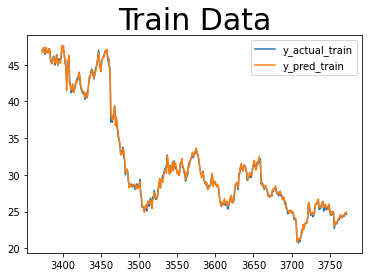

In [156]:
true_predict_train.iloc[-400:,:].plot()
plt.title('Train Data',fontsize='30')

As above,seems overfit

> Then, predict test data

In [157]:
y_test_predict=model.predict(X_test_scaled)
y_pred_test=y_test_scaler.inverse_transform(y_test_predict)
y_actual_test=y_test_scaler.inverse_transform(y_test_scaled)

In [158]:
true_predict_test=pd.concat([pd.DataFrame(y_actual_test),pd.DataFrame(y_pred_test)],axis=1)
true_predict_test.columns=['y_actual_test','y_pred_test']
true_predict_test

,y_actual_test,y_pred_test
0,24.790001,26.790148
1,25.389999,27.208847
2,25.660000,27.568409
3,25.370001,27.520632
4,25.740000,27.726784
...,...,...
995,65.010002,63.240200
996,76.790001,102.448212
997,147.979996,119.442703
998,347.510010,289.351990


Text(0.5, 1.0, 'Test Data')

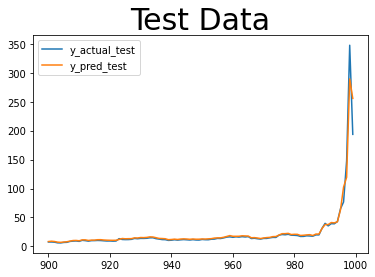

In [163]:
true_predict_test.iloc[-100:,:].plot()
plt.title('Test Data',fontsize='30')

In [170]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
def mape(y_pred,y_true):
    return np.mean(np.abs((y_pred-y_true)/y_true))*100
print('Training data: MAE/MSE/MAPE')
print(mean_absolute_error(y_pred_train, y_actual_train))
print(mean_squared_error(y_pred_train, y_actual_train) )
print(mape(y_pred_train, y_actual_train) )
print('Test data: MAE/MSE/MAPE')
print(mean_absolute_error(y_pred_test, y_actual_test))
print(mean_squared_error(y_pred_test, y_actual_test))
print(mape(y_pred_test, y_actual_test) )

Training data: MAE/MSE/MAPE
0.23293838626094182
0.11329948487758527
0.9804063824808745
Test data: MAE/MSE/MAPE
1.6013009746074676
10.851765852860542
15.401770840789117


TODO： 需要改为预测n天之后的数据的target。 因为我们无法拿到1个月之后的open price, minimum price等数据，只能根据历史数据推测<br>
I think lag should be 30